# SIADS 696 - Milestone II June 2023 - Greg Holden (gsholden@umich.edu)

In [1]:
# Import modules

import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly
import plotly.express as px

from numpy import mean
from numpy import std
from numpy import arange, argmax

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.linear_model import LinearRegression, LogisticRegression
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import shap

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

# Section 1: EDA

In [2]:
# Load data
df = pd.read_csv('events.csv')

In [3]:
# Review first few entries
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy


In [4]:
# Check data types and completeness
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [5]:
# Review numbers of views and purchases
df['event_type'].value_counts()

view        793748
cart         54035
purchase     37346
Name: event_type, dtype: int64

In [6]:
# Review top categories
df['category_code'].value_counts().head(10)

computers.components.videocards     116717
electronics.telephone                84360
computers.peripherals.printer        43224
stationery.cartrige                  38725
electronics.audio.acoustic           26766
computers.components.motherboard     26604
computers.notebook                   25032
computers.components.cpu             24773
electronics.video.tv                 21398
electronics.tablet                   19382
Name: category_code, dtype: int64

In [7]:
# Review top brands
df['brand'].value_counts().head(10)

asus         27706
gigabyte     27673
msi          24877
palit        24802
samsung      23208
amd          20110
canon        18438
panasonic    11992
pioneer      11467
sirius       11409
Name: brand, dtype: int64

In [8]:
# Count how many distinct brands
df['brand'].nunique()

999

In [9]:
# Show range of prices
df['price'].describe()

count    885129.000000
mean        146.328713
std         296.807683
min           0.220000
25%          26.460000
50%          65.710000
75%         190.490000
max       64771.060000
Name: price, dtype: float64

In [10]:
# Show which user_ids are most active
df['user_id'].value_counts()

1515915625554995474    572
1515915625527763086    424
1515915625591251010    363
1515915625591659523    339
1515915625537803839    329
                      ... 
1515915625541761876      1
1515915625541762343      1
1515915625541762272      1
1515915625541762044      1
1515915625611024030      1
Name: user_id, Length: 407283, dtype: int64

In [11]:
# Show longest user sessions
df['user_session'].value_counts()

nFlhu5QzOd    572
9HqvxzKlPb    424
F6ohHpTTBU    293
iP9cILMFNS    260
BejOXRngEW    215
             ... 
q1TBz1LVkq      1
U3dPvtULrF      1
ydhD0G8EAL      1
z5YIzOJdxL      1
9pCbKMIcSx      1
Name: user_session, Length: 490398, dtype: int64

In [12]:
# Review a selected user session
test_session = df[df['user_session']=='nFlhu5QzOd']
test_session.tail(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
825700,2021-02-18 07:59:43 UTC,view,847412,2144415923744800906,appliances.environment.vacuum,thomas,120.00,1515915625554995474,nFlhu5QzOd
825701,2021-02-18 07:59:47 UTC,view,37774,2144415923744800906,appliances.environment.vacuum,thomas,167.62,1515915625554995474,nFlhu5QzOd
825703,2021-02-18 07:59:51 UTC,view,247085,2144415923744800906,appliances.environment.vacuum,thomas,262.48,1515915625554995474,nFlhu5QzOd


In [13]:
# Review activity of a single user
test_user = df[df['user_id']==1515915625568273951]
test_user.tail(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
882477,2021-02-28 13:36:44 UTC,view,3967707,2144415922427789416,computers.components.videocards,gigabyte,672.63,1515915625568273951,roy8lvJwlT
884940,2021-02-28 22:23:54 UTC,view,3967707,2144415922427789416,computers.components.videocards,gigabyte,672.63,1515915625568273951,pta6pwMnXZ
884991,2021-02-28 22:51:06 UTC,view,3967707,2144415922427789416,computers.components.videocards,gigabyte,672.63,1515915625568273951,UX5wjSN1kl


In [14]:
# Count number of unique products
df['product_id'].nunique()

53453

In [15]:
# Count number of unique categories
df['category_id'].nunique()

718

In [16]:
# Count number of unique user sessions
df['user_session'].nunique()

490398

# Section 2:  Feature Engineering

# 2a. Calculate web-based metrics --- number of pages visited per session and session duration

In [17]:
# Calculate number of pages visited per session
session_views = df.groupby(['user_session'])['event_type'].count().reset_index()
session_views = session_views.rename(columns={"event_type": "num_page_views"})
session_views.head()

,user_session,num_page_views
0,000AMhYaQu,1
1,000c34fa-991f-442a-8e07-8c472269bec6,1
2,001HttdHUk,1
3,001P7lK0Pt,2
4,001RxUtFJa,1


In [18]:
# Show value counts for page views
print(len(session_views))
session_views['num_page_views'].value_counts()

490398


1      349667
2       68536
3       29833
4       14744
5        8321
        ...  
94          1
116         1
139         1
95          1
293         1
Name: num_page_views, Length: 123, dtype: int64

In [19]:
# Merge number of session views into main df
df = df.merge(session_views,on='user_session',how='left')
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,num_page_views
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,1.0
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,3.0
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,1.0


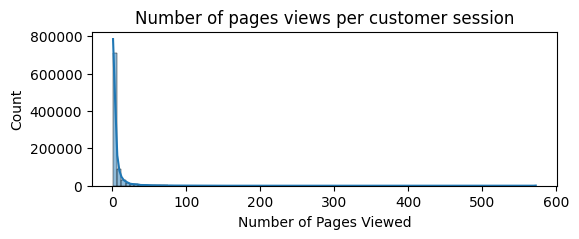

In [20]:
# Plot histogram of number of pages viewed in each session

# Create chart
plt.figure(figsize=(6, 2))

# Create histplot
sns.histplot(data=df, x='num_page_views', bins=100, kde=True)

# Add title and axis labels
plt.title('Number of pages views per customer session')
plt.xlabel('Number of Pages Viewed')
plt.ylabel('Count')

# Show chart
plt.show()

# Calculate length of each browsing session

In [21]:
# Convert event_time to pd.datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Calculate session duration
browsing_time = df.groupby('user_session')['event_time'].agg(lambda x:  max(x) - min(x)).to_frame().rename(columns={'event_time':'session_duration'})
browsing_time['session_duration'] = browsing_time['session_duration'].dt.seconds
browsing_time.head()

,session_duration
user_session,
000AMhYaQu,0
000c34fa-991f-442a-8e07-8c472269bec6,0
001HttdHUk,0
001P7lK0Pt,13
001RxUtFJa,0


In [22]:
# Review distibution of session length values
browsing_time['session_duration'].value_counts()

0        350060
21          687
7           652
20          652
17          647
          ...  
64960         1
80408         1
84205         1
84030         1
30309         1
Name: session_duration, Length: 21838, dtype: int64

In [23]:
# Merge browsing duration into main df
df = df.merge(browsing_time,on='user_session',how='left')
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,num_page_views,session_duration
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,1.0,0.0
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,3.0,1351.0
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,1.0,0.0


In [24]:
# Confirm that session duration from browsing time ties out to main df
test_session = df[df['user_session']=='001P7lK0Pt']
test_session.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,num_page_views,session_duration
221736,2020-11-06 01:25:30+00:00,view,3605162,2144415924684325027,electronics.audio.headphone,NaN,18.86,1515915625536141302,001P7lK0Pt,2.0,13.0
221737,2020-11-06 01:25:43+00:00,view,3585175,2144415924684325027,electronics.audio.headphone,samsung,148.84,1515915625536141302,001P7lK0Pt,2.0,13.0


# 2b.  Add traditional marketing metrics - recency

In [25]:
# Calculate recency
latest_event_time = df['event_time'].max()
df['recency'] = (latest_event_time - df['event_time']).dt.days

In [26]:
# Confirm that recency has been added to main df
df.tail(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,num_page_views,session_duration,recency
885126,2021-02-28 23:58:09+00:00,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd,1.0,0.0,0
885127,2021-02-28 23:58:14+00:00,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx,1.0,0.0,0
885128,2021-02-28 23:59:09+00:00,view,743182,2144415935631458761,construction.tools.soldering,kada,65.08,1515915625556087775,BejOXRngEW,215.0,77776.0,0


# 2c. Split category code field into individual product and category columns

In [27]:
# Split category codes
split_categories = df['category_code'].str.split(".")
print(split_categories.shape)

# Make the last word in the string the product
df['product'] = split_categories.str[-1]

# Make the first word in the string the category
df['category'] = split_categories.str[0]

# Confirm splitting process worked
df.head(3)

(885129,)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,num_page_views,session_duration,recency,product,category
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,1.0,0.0,157,telephone,electronics
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,3.0,1351.0,157,cooler,computers
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,1.0,0.0,157,NaN,NaN


In [28]:
# Calculate NaNs
df.isnull().sum()

event_time               0
event_type               0
product_id               0
category_id              0
category_code       236219
brand               212364
price                    0
user_id                  0
user_session           165
num_page_views         165
session_duration       165
recency                  0
product             236219
category            236219
dtype: int64

In [29]:
# Review shape before dropping NaNs
print("Shape before",df.shape)

# Drop NaNs
df.dropna(inplace=True)

# Review shape after dropping NaNs
print("Shape after",df.shape)

# Get info to confirm number of remaining rows
df.info()

Shape before (885129, 14)
Shape after (516256, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 516256 entries, 1 to 885128
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   event_time        516256 non-null  datetime64[ns, UTC]
 1   event_type        516256 non-null  object             
 2   product_id        516256 non-null  int64              
 3   category_id       516256 non-null  int64              
 4   category_code     516256 non-null  object             
 5   brand             516256 non-null  object             
 6   price             516256 non-null  float64            
 7   user_id           516256 non-null  int64              
 8   user_session      516256 non-null  object             
 9   num_page_views    516256 non-null  float64            
 10  session_duration  516256 non-null  float64            
 11  recency           516256 non-null  int64             

In [30]:
# Count how many unique categories
df['category'].nunique()

14

In [31]:
# Show value counts of categories
df['category'].value_counts()

computers       270417
electronics     124602
appliances       34805
stationery       31232
auto             29989
construction     18964
country_yard      3106
accessories       1939
kids               353
medicine           321
sport              217
furniture          147
jewelry            111
apparel             53
Name: category, dtype: int64

In [32]:
# Count how many unique products
df['product'].nunique()

103

In [33]:
# Review top products
df['product'].value_counts()

videocards       99554
telephone        47016
printer          33512
cartrige         27836
motherboard      26600
                 ...  
watering            38
bath                33
blanket             26
refrigerators       15
winch                6
Name: product, Length: 103, dtype: int64

# 2d.  Convert categorial product and category columns to numerical values

In [34]:
# Use get dummies to create 1/0 columns for each product and category
df = pd.get_dummies(df, columns=['category','product'])
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,num_page_views,...,product_videoregister,product_vr,product_washer,product_watering,product_weather_station,product_welding,product_wifi,product_winch,product_window,product_wrench
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,3.0,...,0,0,0,0,0,0,0,0,0,0
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,1.0,...,0,0,0,0,0,0,0,0,0,0
5,2020-09-24 11:57:59+00:00,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1515915625519388062,vnkdP81DDW,1.0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Review columns in df
df.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session',
       'num_page_views',
       ...
       'product_videoregister', 'product_vr', 'product_washer',
       'product_watering', 'product_weather_station', 'product_welding',
       'product_wifi', 'product_winch', 'product_window', 'product_wrench'],
      dtype='object', length=129)

# 2e.  Create column bucketing price by quartile

In [36]:
# Reivew distribution of values for price column
df['price'].describe()

count    516256.000000
mean        188.908173
std         347.516805
min           0.900000
25%          45.240000
50%         105.870000
75%         249.380000
max       64771.060000
Name: price, dtype: float64

In [37]:
# Calculate quartile values for price columns
price_min = df['price'].min()
print('Min:', price_min)

price_25 = df['price'].quantile(0.25)
print('25th percentile:', price_25)

price_50 = df['price'].quantile(0.5)
print('25th percentile:', price_50)

price_75 = df['price'].quantile(0.75)
print('75th percentile:', price_75)

price_max = df['price'].max()
print('Max', price_max)

Min: 0.9
25th percentile: 45.24
25th percentile: 105.87
75th percentile: 249.38
Max 64771.06


In [38]:
# Create new column based on price quartiles
df['price_quartile'] = (
    pd.cut(
    df['price'], bins=[price_min,price_25,price_50,price_75,price_max],
    labels=[1,2,3,4],include_lowest=True)
)

In [39]:
# Review newly created price quartile column
df['price_quartile'].head()

1    1
3    3
5    2
7    2
9    2
Name: price_quartile, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [40]:
# Confirm that quartile column looks right
df.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,num_page_views,...,product_vr,product_washer,product_watering,product_weather_station,product_welding,product_wifi,product_winch,product_window,product_wrench,price_quartile
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,3.0,...,0,0,0,0,0,0,0,0,0,1
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,1.0,...,0,0,0,0,0,0,0,0,0,3
5,2020-09-24 11:57:59+00:00,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1515915625519388062,vnkdP81DDW,1.0,...,0,0,0,0,0,0,0,0,0,2


# 2f.  Narrow down df to include only completed purchases

In [41]:
# Take subset of df based only on purchase transactions
purchases = df[df['event_type']=='purchase']
purchases.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,num_page_views,...,product_vr,product_washer,product_watering,product_weather_station,product_welding,product_wifi,product_winch,product_window,product_wrench,price_quartile
45,2020-09-24 12:04:10+00:00,purchase,1507291,2144415926806642904,computers.components.power_supply,supermicro,217.57,1515915625519390468,xn6SHCnZtk,2.0,...,0,0,0,0,0,0,0,0,0,3
82,2020-09-24 12:15:06+00:00,purchase,822426,2144415922360680550,computers.peripherals.camera,logitech,123.35,1515915625513574486,2gngxS29Ts,11.0,...,0,0,0,0,0,0,0,0,0,3
150,2020-09-24 12:29:49+00:00,purchase,1283197,2144415973413749245,computers.peripherals.nas,zyxel,123.79,1515915625519356010,3jFpdbozOd,6.0,...,0,0,0,0,0,0,0,0,0,3


In [42]:
# Review last few entries in purchases df
purchases.tail(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,num_page_views,...,product_vr,product_washer,product_watering,product_weather_station,product_welding,product_wifi,product_winch,product_window,product_wrench,price_quartile
885082,2021-02-28 23:23:11+00:00,purchase,500058,2144415923107266682,computers.peripherals.printer,pantum,67.00,1515915625610973155,CxMKMQDRAN,11.0,...,0,0,0,0,0,0,0,0,0,2
885090,2021-02-28 23:26:07+00:00,purchase,500058,2144415923107266682,computers.peripherals.printer,pantum,67.00,1515915625610973155,CxMKMQDRAN,11.0,...,0,0,0,0,0,0,0,0,0,2
885096,2021-02-28 23:30:24+00:00,purchase,3829572,2144415924021624977,electronics.tablet,samsung,57.62,1515915625597508619,EqOuydyqRJ,3.0,...,0,0,0,0,0,0,0,0,0,2


In [43]:
# Review first few values in recency column
purchases['recency'].head(3)

45     157
82     157
150    157
Name: recency, dtype: int64

# 2g.  Add Monetary Value based only on completed purchases

In [44]:
# Calculate monetary value
monetary = purchases.groupby('user_id')['price'].sum().reset_index()
monetary.rename(columns={'price': 'monetary_value'}, inplace=True)
monetary.head(3)

,user_id,monetary_value
0,1515915625353286099,119.03
1,1515915625353457259,55.16
2,1515915625353534622,57.15


In [45]:
# Merge monetary value into purchases df
purchases = purchases.merge(monetary,on='user_id',how='left')

# Review first few rows
purchases['monetary_value'].head(3)

0    217.57
1    616.75
2    123.79
Name: monetary_value, dtype: float64

# 2h.  Add Frequency based on number of completed purchases

In [46]:
# Calculate frequency
frequency = purchases.groupby('user_id')['event_time'].count().reset_index()
frequency.rename(columns={'event_time': 'frequency'}, inplace=True)

# Review first few rows
frequency.head(3)

,user_id,frequency
0,1515915625353286099,1
1,1515915625353457259,1
2,1515915625353534622,3


In [47]:
# Merge frequency into purchases df
purchases = purchases.merge(frequency,on='user_id',how='left')

# Review first few rows
purchases['frequency'].head(3)

0    1
1    5
2    1
Name: frequency, dtype: int64

In [48]:
# Check shape of purchases df
purchases.shape

(23106, 132)

In [49]:
# Review datatypes of purchases df
purchases.dtypes

event_time        datetime64[ns, UTC]
event_type                     object
product_id                      int64
category_id                     int64
category_code                  object
                         ...         
product_window                  uint8
product_wrench                  uint8
price_quartile               category
monetary_value                float64
frequency                       int64
Length: 132, dtype: object

In [50]:
# Confirm there are no more NaNs
purchases.isnull().sum()

event_time        0
event_type        0
product_id        0
category_id       0
category_code     0
                 ..
product_window    0
product_wrench    0
price_quartile    0
monetary_value    0
frequency         0
Length: 132, dtype: int64

In [51]:
# Review key stats for newly created marketing variables
purchases[['num_page_views','session_duration','recency','frequency','monetary_value']].describe()

,num_page_views,session_duration,recency,frequency,monetary_value
count,23106.000000,23106.000000,23106.000000,23106.000000,23106.000000
mean,10.366269,8927.303081,71.282394,3.408119,600.159923
std,17.789810,19189.434723,44.764662,4.682083,1075.710907
min,1.000000,0.000000,0.000000,1.000000,0.900000
25%,4.000000,262.000000,32.000000,1.000000,87.780000
50%,6.000000,958.000000,68.000000,2.000000,257.870000
75%,11.000000,4759.000000,109.000000,4.000000,646.740000
max,293.000000,86324.000000,157.000000,56.000000,12080.830000


In [52]:
# Review details of most expensive purchase
max_purchase = purchases.loc[purchases['monetary_value']==12080.830000]
max_purchase.head(3)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,num_page_views,...,product_watering,product_weather_station,product_welding,product_wifi,product_winch,product_window,product_wrench,price_quartile,monetary_value,frequency
19163,2021-02-07 00:31:36+00:00,purchase,3791351,2144415926966026460,computers.components.cpu,amd,204.29,1515915625601579158,UrgkcsrOv0,84.0,...,0,0,0,0,0,0,0,3,12080.83,56
19164,2021-02-07 00:31:36+00:00,purchase,3792149,2144415924491387038,computers.components.motherboard,asrock,185.14,1515915625601579158,UrgkcsrOv0,84.0,...,0,0,0,0,0,0,0,3,12080.83,56
19165,2021-02-07 00:31:36+00:00,purchase,3945564,2144415924491387038,computers.components.motherboard,msi,199.37,1515915625601579158,UrgkcsrOv0,84.0,...,0,0,0,0,0,0,0,3,12080.83,56


# 2i.  Review correlation between these web-based metrics

<AxesSubplot:>

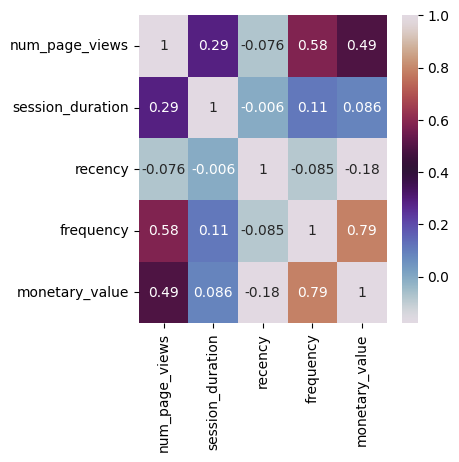

In [53]:
# Get selection of variables to use in correlation matrix
df_web = purchases[['num_page_views','session_duration','recency','frequency','monetary_value']]

# Create figure
plt.figure(figsize = (4,4))

# Create correlation matrix
c = df_web.corr()

# Plot heatmap
sns.heatmap(c, annot = True, cmap = 'twilight')

# Section 3:  Supervised Learning

# 3a.  Use linear regression to test the relationship between prices and all other variables

In [54]:
# Create list of columns to drop
cols_to_drop = ['price','price_quartile','event_time','event_type',
                'product_id','category_id','category_code','brand','user_id',
                'user_session','monetary_value']

# Create x and y variables
X = purchases.drop(cols_to_drop,axis=1)
y = purchases[['price']]

# Add constant
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# View model summary
#print(model.summary())

# 3b.  Linear regression using only web-base stats and r and f metrics

In [55]:
# Create x and y variables
X = purchases[['num_page_views','session_duration','recency','frequency']]
y = purchases[['price']]

# Fit scaler on x variables
norm_X = MinMaxScaler().fit(X)

# Transform x data
X_norm = norm_X.transform(X)

# Fit scaler on y data
norm_Y = MinMaxScaler().fit(y)
y_norm = norm_Y.transform(y)

# Add constant
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y_norm, X_norm).fit()

# Show model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.278
Model:                            OLS   Adj. R-squared (uncentered):              0.278
Method:                 Least Squares   F-statistic:                              2228.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):                        0.00
Time:                        15:05:03   Log-Likelihood:                          32531.
No. Observations:               23106   AIC:                                 -6.505e+04
Df Residuals:                   23102   BIC:                                 -6.502e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# 3c.  Random forest with only web-based metrics

In [56]:
# Review key statistics for recency
purchases['recency'].describe()

count    23106.000000
mean        71.282394
std         44.764662
min          0.000000
25%         32.000000
50%         68.000000
75%        109.000000
max        157.000000
Name: recency, dtype: float64

In [57]:
# Review key statistics for frequency
purchases['frequency'].describe()

count    23106.000000
mean         3.408119
std          4.682083
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         56.000000
Name: frequency, dtype: float64

Accuracy: 0.3617794703133114
Precision: 0.3806477905371365
Recall: 0.3617794703133114
F1 Score: 0.30693374816205793
recency             0.722896
num_page_views      0.105711
session_duration    0.090661
frequency           0.080732
dtype: float64


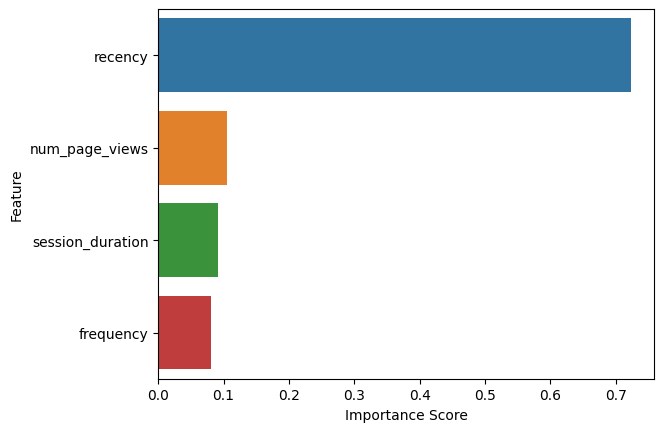

In [58]:
# Random forest using only web-based metrics

# Create x and y variables
X = purchases[['num_page_views','session_duration','recency','frequency']]
y = purchases[['price_quartile']]
y = y.values.reshape(-1,)

#  Set up train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 99)

# Create model
rfc = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=3,random_state=99)

# Fit model
rfc.fit(X_train,y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Create list of names for chart
col_list = ['num_page_views','session_duration','recency','frequency']

# Create feature importance list
feature_imp = pd.Series(rfc.feature_importances_,index=col_list).sort_values(ascending=False)
print(feature_imp)

# Create bar chart for most important features
sns.barplot(x=feature_imp[0:15], y=feature_imp[0:15].index)

# Create axis labels
plt.xlabel('Importance Score')
plt.ylabel('Feature')

# Show plot
plt.show()

# Use cross validation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(rfc, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# 3d.  Moving beyond the price quartile experiment, can web-based metrics be used to predict sales of a brand or product or category?

In [59]:
# Show top brands
purchases['brand'].value_counts()

msi           1788
gigabyte      1741
asus          1259
palit         1077
canon         1033
              ... 
greenworks       1
gfgril           1
candy            1
qnap             1
redmi            1
Name: brand, Length: 334, dtype: int64

In [60]:
# Choose a single brand to analyze
brand = 'msi'

# Create new col in purchases df that has 1 if chosen brand matches or 0 otherwise
purchases['brand_test'] = np.where(purchases['brand']==brand,1,0)
purchases['brand_test'].value_counts()

0    21318
1     1788
Name: brand_test, dtype: int64

# Use random forest to see if web-based metrics influence purchase of a specific brand

Accuracy: 0.9222779989613986
Precision: 0.889592585015815
Recall: 0.9222779989613986
F1 Score: 0.8853261837857751
recency             0.622057
num_page_views      0.219571
frequency           0.127742
session_duration    0.030629
dtype: float64


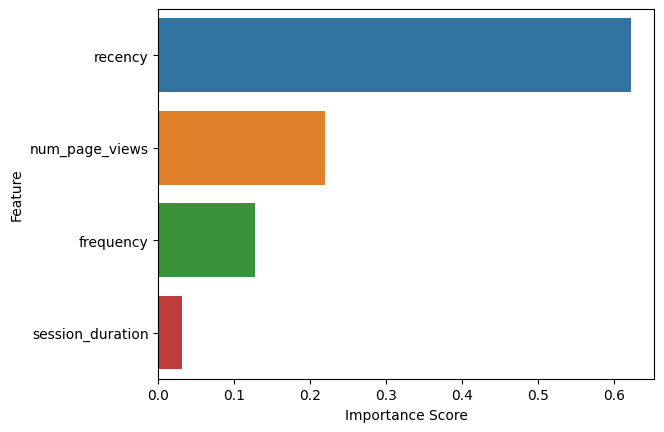

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5328
           1       0.50      0.00      0.00       449

    accuracy                           0.92      5777
   macro avg       0.71      0.50      0.48      5777
weighted avg       0.89      0.92      0.89      5777

[[5327    1]
 [ 448    1]]


In [61]:
# Create x and y variables
X = purchases[['num_page_views','session_duration','recency','frequency']]
y = purchases[['brand_test']]
y = y.values.reshape(-1,)

# Set up train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 99)

# Create random forest model
rfc = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=3,random_state=99)

# Fit model
rfc.fit(X_train,y_train)

# Make model predictions
y_pred = rfc.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Create list of features for chart
col_list = ['num_page_views','session_duration','recency','frequency']

#  Create list of feature importances
feature_imp = pd.Series(rfc.feature_importances_,index=col_list).sort_values(ascending=False)
print(feature_imp)

# Create feature importance chart
sns.barplot(x=feature_imp[0:15], y=feature_imp[0:15].index)

# Add axis labels
plt.xlabel('Importance Score')
plt.ylabel('Feature')

# Show chart
plt.show()

# Calulate cross validation scores
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(rfc, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# Print results of cross validation
#print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# Calculate and show classification report
print(classification_report(y_test,y_pred,zero_division=0))

# Calculate and show confusion matrix
print(confusion_matrix(y_test, y_pred))

# 3e.  Given class imbalance use SMOTE to balance sample

Number of ones: 15990
Number of zeros: 15990
Accuracy: 0.5845594599272979
Precision: 0.9030331131328585
Recall: 0.5845594599272979
F1 Score: 0.6780263689915464


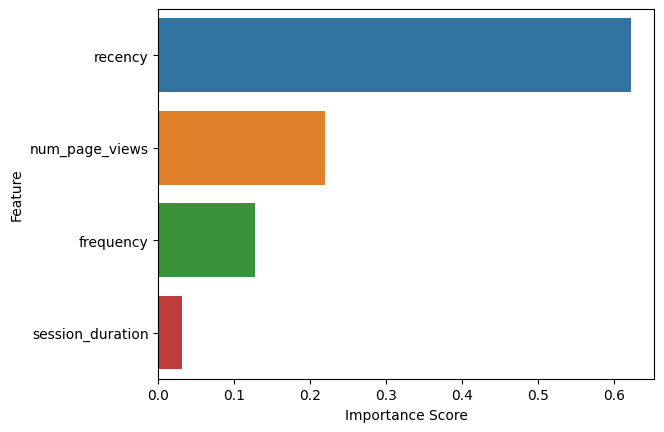

              precision    recall  f1-score   support

           0       0.97      0.57      0.72      5328
           1       0.13      0.78      0.23       449

    accuracy                           0.58      5777
   macro avg       0.55      0.67      0.47      5777
weighted avg       0.90      0.58      0.68      5777

[[3028 2300]
 [ 100  349]]


In [62]:
# Create x and y variables
X = purchases[['num_page_views','session_duration','recency','frequency']]
y = purchases[['brand_test']]
y = y.values.reshape(-1,)

# Set up train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 99)

# Create SMOTE instance
smote = SMOTE(random_state=99)

# Fit training data using SMOTE
X_train_res, y_train_res = smote.fit_resample(X_train,y_train.ravel())

# Count number of 1s post SMOTE resampling
ones = sum(y_train_res == 1)
print("Number of ones:",ones)

# Count number of 0s post SMOTE resampling
zeros = sum(y_train_res == 0)
print("Number of zeros:",zeros)

# Run random forest based on SMOTE data

# Create model
rfc = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=3,random_state=99)

# Fit model
rfc.fit(X_train_res,y_train_res)

# Make predictions
y_pred = rfc.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Create bar chart of most important features
sns.barplot(x=feature_imp[0:15], y=feature_imp[0:15].index)

# Add axis labels
plt.xlabel('Importance Score')
plt.ylabel('Feature')

# Show chart
plt.show()

# Calculate and show classification report
print(classification_report(y_test,y_pred,zero_division=0))

# Calculate and show confusion matrix
print(confusion_matrix(y_test, y_pred))

# 3f.  Use specific product or category instead of brand (already a 1/0 dummy variable)

# Choose specific product or category -- this choice flows through the rest of the supervised analysis

In [63]:
# Choose a product or category to analyze
prod_cat = 'product_telephone'

In [64]:
# Show how maby examples there are of the chosen product or category
print(purchases[prod_cat].value_counts())
print(len(purchases))

0    21512
1     1594
Name: product_telephone, dtype: int64
23106


# Use random forest to test if web-based stats predict that a certain product or category will be purchased.

Number of ones: 16136
Number of zeros: 16136
frequency           0.464951
num_page_views      0.304044
session_duration    0.124108
recency             0.106897
dtype: float64


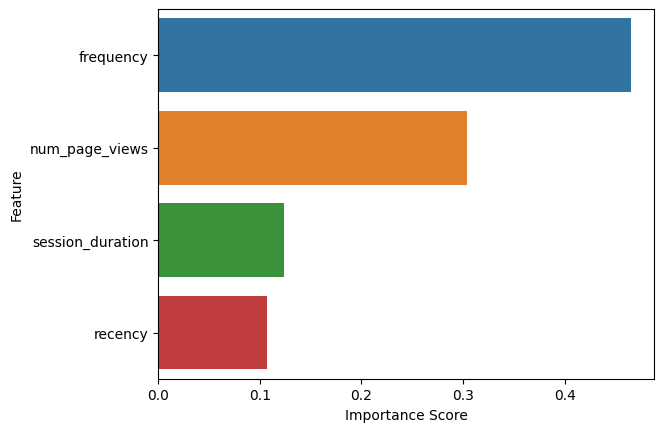

Avg. Accuracy: 0.6263023621616315
Avg. Precision Score: 0.6038089718874855
Avg. Recall Score: 0.7340737365836351
Avg. F1 Score: 0.6218282755246554
              precision    recall  f1-score   support

           0       0.95      0.51      0.66      5376
           1       0.09      0.64      0.16       401

    accuracy                           0.52      5777
   macro avg       0.52      0.57      0.41      5777
weighted avg       0.89      0.52      0.63      5777



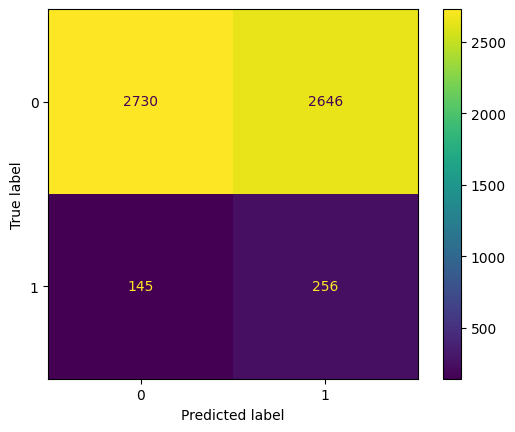

In [65]:
# Create x and y variables
X = purchases[['num_page_views','session_duration','recency','frequency']]
y = purchases[[prod_cat]]
y = y.values.reshape(-1,)

# Normalize x data
normalizer = MinMaxScaler()
normalizer.fit(X)
X_normalized = normalizer.transform(X)

# Set up train-test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized,y,test_size = 0.25, random_state = 99)

# Create SMOTE instance
smote = SMOTE(random_state=99)

# Run SMOTE on training data
X_train_res, y_train_res = smote.fit_resample(X_train,y_train.ravel())

# Count number of 1s post SMOTE resampling
ones = sum(y_train_res == 1)
print("Number of ones:",ones)

# Count number of 0s post SMOTE resampling
zeros = sum(y_train_res == 0)
print("Number of zeros:",zeros)

# Create model
rfc = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=3,random_state=99)

# Fit model
rfc.fit(X_train_res,y_train_res)

# Make predictions
y_pred = rfc.predict(X_test)

# Create list of feature names for chart
col_list = ['num_page_views','session_duration','recency','frequency']

#  Create feature importance list
feature_imp = pd.Series(rfc.feature_importances_,index=col_list).sort_values(ascending=False)
print(feature_imp)

# Create bar chart of most important features
sns.barplot(x=feature_imp[0:15], y=feature_imp[0:15].index)

# Add axis labels
plt.xlabel('Importance Score')
plt.ylabel('Feature')

# Show chart
plt.show()

# Use cross validation to calculate evaluation metrics
scores_acc = cross_validate(rfc, X_train_res, y_train_res, cv=5, scoring='accuracy')
print('Avg. Accuracy:', scores_acc['test_score'].mean())

scores_pre = cross_validate(rfc, X_train_res, y_train_res, cv=5, scoring='precision')
print('Avg. Precision Score:', scores_pre['test_score'].mean())

scores_recall = cross_validate(rfc, X_train_res, y_train_res, cv=5, scoring='recall')
print('Avg. Recall Score:', scores_recall['test_score'].mean())

scores_f1 = cross_validate(rfc, X_train_res, y_train_res, cv=5, scoring='f1_macro')
print('Avg. F1 Score:', scores_f1['test_score'].mean())

# Calculate and show classification report
print(classification_report(y_test,y_pred,zero_division=0))

# Calculate and show confustion matrix
cm_rfc = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc,display_labels=rfc.classes_)
disp.plot()

# Same question as above but with dummy classifier

Number of ones: 16136
Number of zeros: 16136
Avg. Accuracy: 0.5028819768908587
Avg. Precision Score: 0.502996078582561
Avg. Recall Score: 0.4960950798885949
Avg. F1 Score: 0.5028183781300253
              precision    recall  f1-score   support

           0       0.93      0.51      0.66      5376
           1       0.07      0.49      0.12       401

    accuracy                           0.51      5777
   macro avg       0.50      0.50      0.39      5777
weighted avg       0.87      0.51      0.62      5777



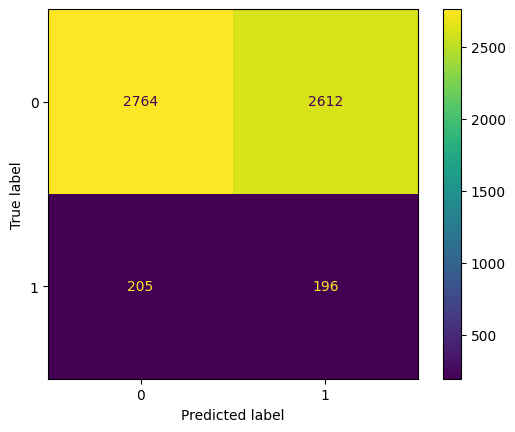

In [66]:
# Set random seed
random_seed = 99

# Create x and y variables
X = purchases[['num_page_views','session_duration','recency','frequency']]
y = purchases[[prod_cat]]
y = y.values.reshape(-1,)

# Normalize X data
normalizer = MinMaxScaler()
normalizer.fit(X)
X_normalized = normalizer.transform(X)

# Set up train-test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized,y,test_size = 0.25, random_state = 99)

# Create SMOTE instance
smote = SMOTE(random_state=99)

# Use SMOTE on training data
X_train_res, y_train_res = smote.fit_resample(X_train,y_train.ravel())

# Count number of 1s post SMOTE resampling
ones = sum(y_train_res == 1)
print("Number of ones:",ones)

# Count number of 0s post SMOTE resampling
zeros = sum(y_train_res == 0)
print("Number of zeros:",zeros)

# Create dummy classifier
dum = DummyClassifier(strategy="stratified",random_state=random_seed)

# Fit model
dum.fit(X_train_res,y_train_res)

# Make predictions
y_pred = dum.predict(X_test)

# Use cross validation to calculate evaluation metrics
scores_acc = cross_validate(dum, X_train_res, y_train_res, cv=5, scoring='accuracy')
print('Avg. Accuracy:', scores_acc['test_score'].mean())

scores_pre = cross_validate(dum, X_train_res, y_train_res, cv=5, scoring='precision')
print('Avg. Precision Score:', scores_pre['test_score'].mean())

scores_recall = cross_validate(dum, X_train_res, y_train_res, cv=5, scoring='recall')
print('Avg. Recall Score:', scores_recall['test_score'].mean())

scores_f1 = cross_validate(dum, X_train_res, y_train_res, cv=5, scoring='f1_macro')
print('Avg. F1 Score:', scores_f1['test_score'].mean())

# Calculate and show classification report
print(classification_report(y_test,y_pred,zero_division=0))

# Calculate and show confusion matrix
cm_dum = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dum,display_labels=dum.classes_)
disp.plot()

# 3g. Test this business question (web-based metrics to predict single category or product) using multiple models

In [67]:
# Set random seed
random_seed = 99

# Create x and y variables
X = purchases[['num_page_views','session_duration','recency','frequency']]
y = purchases[[prod_cat]]
y = y.values.reshape(-1,)

# Normalize x data
normalizer = MinMaxScaler()
normalizer.fit(X)
X_normalized = normalizer.transform(X)

# Set up train-test split
X_train, X_test, y_train, y_test = train_test_split(X_normalized,y,test_size = 0.25, random_state = random_seed)

# Create SMOTE instance
smote = SMOTE(random_state=random_seed)

# Use SMOTE on training data
X_train_res, y_train_res = smote.fit_resample(X_train,y_train.ravel())

# Count number of 1s post SMOTE resampling
ones = sum(y_train_res == 1)
print("Number of ones:",ones)

# Count number of 0s post SMOTE resampling
zeros = sum(y_train_res == 0)
print("Number of zeros:",zeros)

# Set up models
models = {
    'Dummy Classifier': DummyClassifier(strategy="stratified",random_state=random_seed),
    'Logistic Regresion': LogisticRegression(random_state=random_seed),
    'NB': GaussianNB(),
    'SVM': SVC(random_state=random_seed,C=10),
    'KNN': KNeighborsClassifier(3),
    'Random Forest': RandomForestClassifier(random_state=random_seed,n_estimators=300,criterion='gini', max_depth=5),
    'SVM': SVC(random_state=random_seed),
    'XGBoost': XGBClassifier(random_state=random_seed,objective="binary:logistic"),
}

# Set up df for results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Run cross-validation then store in df
for model_name, model in models.items():
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(model, X_train_res, y_train_res, cv=10, scoring=scoring)
    accuracy = scores['test_accuracy'].mean()
    precision = scores['test_precision_macro'].mean()
    recall = scores['test_recall_macro'].mean()
    f1_score = scores['test_f1_macro'].mean()
    accuracy_std = scores['test_accuracy'].std()
    f1_std = scores['test_f1_macro'].std()
    results = results.append({'Model': model_name, 'Accuracy': accuracy,'Acc Stdev': accuracy_std,
                              'Precision': precision, 'Recall': recall,
                              'F1 Score': f1_score,
                              'F1 Stdev': f1_std}, ignore_index=True)

# Run models on test set
for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    accuracy = model.score(X_test, y_test)
    #f1_score = f1_score(y_test, y_pred,average='weighted')
    results.loc[results['Model'] == model_name, 'Accuracy on Test Set'] = accuracy

# Save results to a df
results_df = pd.DataFrame(results)
results_df.round(3)

Number of ones: 16136
Number of zeros: 16136


,Model,Accuracy,Precision,Recall,F1 Score,Acc Stdev,F1 Stdev,Accuracy on Test Set
0,Dummy Classifier,0.503,0.503,0.503,0.503,0.020,0.020,0.512
1,Logistic Regresion,0.542,0.542,0.542,0.539,0.009,0.010,0.479
2,NB,0.545,0.600,0.545,0.471,0.006,0.008,0.223
3,SVM,0.566,0.568,0.566,0.562,0.005,0.005,0.472
4,KNN,0.897,0.901,0.897,0.897,0.006,0.006,0.850
5,Random Forest,0.704,0.713,0.704,0.701,0.032,0.031,0.611
6,XGBoost,0.931,0.939,0.931,0.930,0.065,0.070,0.922


# 3i.  Focus on best performing model -- XGBoost Classifier

# XGB including SMOTE

In [68]:
# Create x and y variables
X = purchases[['num_page_views','session_duration','recency','frequency']]
y = purchases[[prod_cat]]
y = y.values.reshape(-1,)

# Set up train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 99)

# Create SMOTE instance
smote = SMOTE(random_state=99)

# Use SMOTE on training data
X_res, y_res = smote.fit_resample(X_train,y_train.ravel())

# Count number of 1s post SMOTE resampling 
ones = sum(y_res == 1)
print("Number of ones:",ones)

# Count number of 0s post SMOTE resampling 
zeros = sum(y_res == 0)
print("Number of zeros:",zeros)

# Create model
xgb_clf_smote = XGBClassifier(objective='binary:logistic',
                         learning_rate=0.3,
                         n_estimators=100, min_child_weight=1,gamma=0.0,
                         colsample_bytree=1,
                         max_depth=6,random_state=99)
# Fit model
xgb_clf_smote.fit(X_res,y_res)

# Make predictions
y_pred = xgb_clf_smote.predict(X_test)

# Set up framework for evaluation metrics
models = {
    'XGBoost': xgb_clf_smote
}

results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Run cross-validation to calculate evaluation metrics
for model_name, model in models.items():
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(model, X_res, y_res, cv=10, scoring=scoring)
    accuracy = scores['test_accuracy'].mean()
    precision = scores['test_precision_macro'].mean()
    recall = scores['test_recall_macro'].mean()
    f1_score = scores['test_f1_macro'].mean()
    f1_std = scores['test_f1_macro'].std()
    results = results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score,'F1 Stdev': f1_std}, ignore_index=True)

# Evaluation based on test set
for model_name, model in models.items():
    model.fit(X_res, y_res)
    accuracy = model.score(X_test, y_test)
    results.loc[results['Model'] == model_name, 'Accuracy on Test Set'] = accuracy

# Show results
results

# Calculate and show classification report
#print(classification_report(y_test, y_pred))

Number of ones: 16136
Number of zeros: 16136


,Model,Accuracy,Precision,Recall,F1 Score,F1 Stdev,Accuracy on Test Set
0,XGBoost,0.917921,0.922603,0.917921,0.917067,0.052119,0.897698


# 3j.  Use GridSearch to tune model

In [69]:
# Create dictionary of parameters to test

params = {
 'n_estimators':  [100,200,300,400,500],
 'learning_rate' : [0.05,0.1,0.20,0.30],
 'max_depth' : [ 4, 6, 8, 10, 12],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.2 ,0.4 ],
 'colsample_bytree' : [ 0.3, 0.5, 1.0]
}

# Run randomized grid search
rs_model=RandomizedSearchCV(xgb_clf_smote,param_distributions=params,
                            n_iter=5,scoring='f1_macro',n_jobs=-1,cv=10,verbose=3)

rs_model.fit(X_res,y_res)

# Print best estimator in each category
rs_model.best_estimator_

Fitting 10 folds for each of 5 candidates, totalling 50 fits


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=99,
              reg_alpha=0, reg_lambda=1, ...)

# 3k.  Final version of XGB -- with SMOTE

Number of ones: 16136
Number of zeros: 16136
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5376
           1       0.32      0.34      0.33       401

    accuracy                           0.90      5777
   macro avg       0.64      0.64      0.64      5777
weighted avg       0.91      0.90      0.91      5777



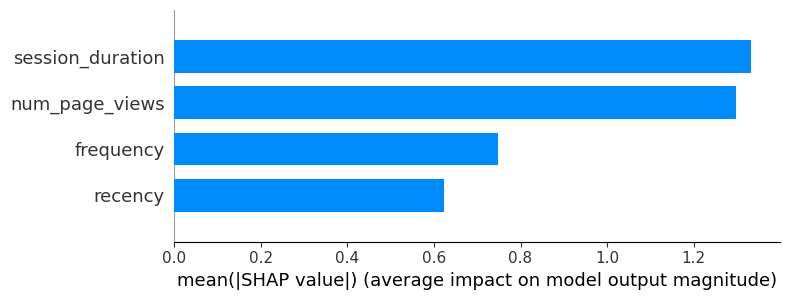

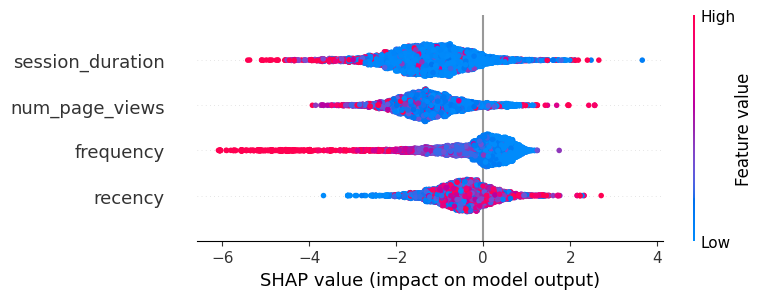

type failure <class 'pandas.core.frame.DataFrame'>


,Model,Accuracy,Precision,Recall,F1 Score,F1 Stdev,Accuracy on Test Set
0,XGBoost,0.942213,0.94526,0.942214,0.941808,0.044154,0.904102


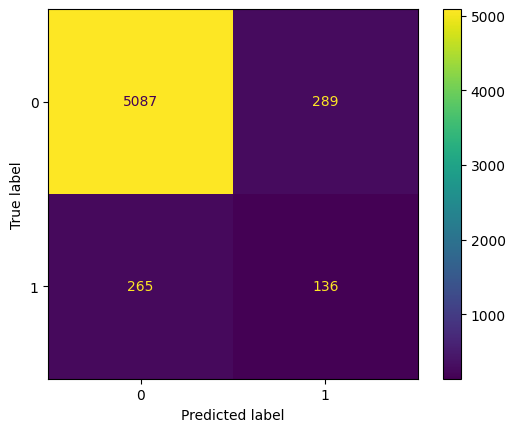

In [70]:
# Create x and y variables
X = purchases[['num_page_views','session_duration','recency','frequency']]
y = purchases[[prod_cat]]
y = y.values.reshape(-1,)

# Set up train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 99)

# Create SMOTE instance
smote = SMOTE(random_state=99)

# Use SMOTE on training data
X_res, y_res = smote.fit_resample(X_train,y_train.ravel())

# Count number of 1s post SMOTE resampling 
ones = sum(y_res == 1)
print("Number of ones:",ones)

# Count number of 0s post SMOTE resampling 
zeros = sum(y_res == 0)
print("Number of zeros:",zeros)

# Create model
xgb_clf_final = XGBClassifier(objective='binary:logistic',
                         learning_rate=0.2,
                         n_estimators=400, min_child_weight=5,gamma=0.4,
                         colsample_bytree=1.0,
                         max_depth=12,random_state=99)
# Fit model
xgb_clf_final.fit(X_res,y_res)

# Make predictions
y_pred = xgb_clf_final.predict(X_test)

# Set up framework for evaluation metrics
models = {
    'XGBoost': xgb_clf_final
}

results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Run cross-validation on evaluation metrics 
for model_name, model in models.items():
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(model, X_res, y_res, cv=10, scoring=scoring)
    accuracy = scores['test_accuracy'].mean()
    precision = scores['test_precision_macro'].mean()
    recall = scores['test_recall_macro'].mean()
    f1_score = scores['test_f1_macro'].mean()
    f1_std = scores['test_f1_macro'].std()
    results = results.append({'Model': model_name, 'Accuracy': accuracy, 
                              'Precision': precision, 'Recall': recall,
                              'F1 Score': f1_score,'F1 Stdev': f1_std}, ignore_index=True)

# Calculate evaluation metrics on test set
for model_name, model in models.items():
    model.fit(X_res, y_res)
    accuracy = model.score(X_test, y_test)
    #f1_score = f1_score(y_test, y_pred,average='weighted')
    results.loc[results['Model'] == model_name, 'Accuracy on Test Set'] = accuracy

# Calculate and show classification report
print(classification_report(y_test, y_pred))

# Create feature importance plot
#plot_importance(xgb_clf_final,importance_type='gain',show_values=False)
#pyplot.show()

# Get SHAP values
explainer = shap.TreeExplainer(xgb_clf_final)
shap_values = explainer.shap_values(X_test)

# Create bar chart of SHAP feature importance
shap_feat = ['num_page_views','session_duration','recency','frequency']
shap.summary_plot(shap_values, X_test, plot_type="bar",feature_names=shap_feat)

# Create SHAP summary plot
shap.summary_plot(shap_values, X_test,feature_names=shap_feat)

# Create confusion matrix
cm_dum = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dum,display_labels=dum.classes_)
disp.plot()

# Create df for failure analysis

# Create list of y_test values
y_test_lst = list(y_test)

# Create list of y_pred values
y_pred_lst = list(y_pred)

# Create copy of x_test to be used in failure analysis
failure_df = pd.DataFrame(X_test.copy())

# Add column headings
failure_df.columns = ['num_page_views','session_duration','recency','frequency']
print("type failure",type(failure_df))

# Add y_test data to failure_df
failure_df.insert(0,'y_test',y_test_lst)

# Add y_pred data to failure_df
failure_df.insert(1,'y_pred',y_pred_lst)

# Show evaluation metrics
results

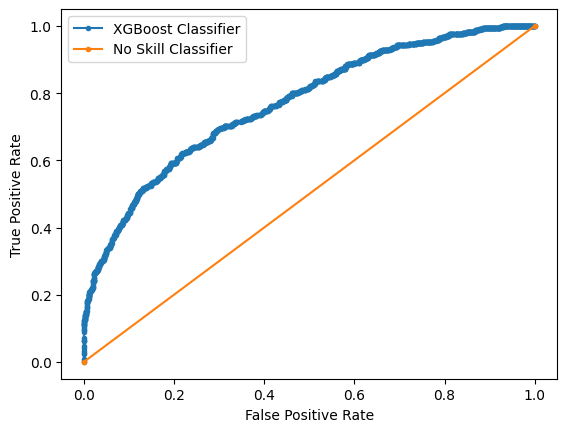

XGBoost Classifier: ROC AUC=0.769
No Skill Classifier: ROC AUC=0.500


In [71]:
# ROC-AUC Curver

#  Create no-skill model for comparison
ns_probs = [0 for _ in range(len(y_test))]

# Calculate probabilities
xgb_probs = xgb_clf_final.predict_proba(X_test)
xgb_probs = xgb_probs[:,1]

# Create ROC-AUC Curve
xgb_auc = roc_auc_score(y_test, xgb_probs)
xgb_fpr,xgb_tpr, _ = roc_curve(y_test, xgb_probs)

# Create ROC-AUC curve for no-skill model
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr,ns_tpr, _ = roc_curve(y_test, ns_probs)

# Create graphs
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost Classifier')
plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Classifier')

# Add axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add legend
plt.legend()

# Show chart
plt.show()

# Print AUC scores
print('XGBoost Classifier: ROC AUC=%.3f' % (xgb_auc))
print('No Skill Classifier: ROC AUC=%.3f' % (ns_auc))

# 3l. Sensitivity Analysis

In [72]:
# Create X and y variables 
X = purchases[['num_page_views','session_duration','recency','frequency']]
y = purchases[[prod_cat]]
y = y.values.reshape(-1,)

# Set up train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 99)

# Create SMOTE instance
smote = SMOTE(random_state=99)

# Use SMOTE on training data
X_res, y_res = smote.fit_resample(X_train,y_train.ravel())

# Learning rate ------------------------------------------------------------------

# Create list of potential LR values to test
lr_vals = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.2,0.30,0.4]

# Create empty list for lr acc scores
lr_scores = []

# Create for loop
for i in lr_vals: 

    # Specify model
    xgb_clf_lr = XGBClassifier(objective='binary:logistic',
                         learning_rate=i,
                         n_estimators=400, min_child_weight=5,gamma=0.4,
                         colsample_bytree=1.0,
                         max_depth=12,random_state=99)
    # Fit model
    xgb_clf_lr.fit(X_res,y_res)
    # Make predictions
    preds_lr = xgb_clf_lr.predict(X_test)
    # Calculate evaluation metric
    acc_lr = accuracy_score(y_test,preds_lr)
    # Add result to list
    lr_scores.append(acc_lr)
    
# Print out results    
print("Learning rates:",lr_scores)
lr_arr = np.array(lr_scores).reshape(-1,1)
print("LR shape",lr_arr.shape)

# Number of estimators ------------------------------------------------------------------

# Create list of possible values to test
n_est_values = [100,200,300,400,500,600,700,800,1000]

# Create empty list for scores
n_est_scores = []

# Create for loop
for i in n_est_values: 

    # Specify model
    xgb_clf_n_est = XGBClassifier(objective='binary:logistic',
                         learning_rate=0.2,
                         n_estimators=i, min_child_weight=5,gamma=0.4,
                         colsample_bytree=1.0,
                         max_depth=12,random_state=99)
    # Fit model
    xgb_clf_n_est.fit(X_res,y_res)
    # Make predictions
    preds_n_est = xgb_clf_n_est.predict(X_test)
    # Calculate evaluation metric
    acc_n_est = accuracy_score(y_test,preds_n_est)
    # Add result to list
    n_est_scores.append(acc_n_est) 

# Print results
print("N_estimators:",n_est_scores)
n_est_arr = np.array(n_est_scores)
print("N est shape",n_est_arr.shape)

# Max depth ------------------------------------------------------------------

# Create list of potential values to test
depth_values = [1,2,4,6,8,10,12,14,16]

# Set up empty list for scores
depth_scores = []

# Set up for loop
for i in depth_values: 

    # Specify model
    xgb_clf_depth = XGBClassifier(objective='binary:logistic',
                             learning_rate=0.2,
                             n_estimators=400, min_child_weight=5,gamma=0.4,
                             colsample_bytree=1.0,
                             max_depth=i,random_state=99)
    # Fit model
    xgb_clf_depth.fit(X_res,y_res)
    # Make predictions
    preds_depth = xgb_clf_depth.predict(X_test)
    # Calculate evaluation metric
    acc_depth = accuracy_score(y_test,preds_depth)
    # Add result to list
    depth_scores.append(acc_depth)

# Print scores
print("Max Depth:",depth_scores)
depth_arr = np.array(depth_scores)
print("Shape max depth",depth_arr.shape)

# # Create 3D chart ------------------------------------------------------------
# from mpl_toolkits import mplot3d

# # Create figure
# fig = plt.figure()
# ax = plt.axes(projection='3d')
 
# # Make plot
# ax.plot_surface(n_est_arr,depth_arr,lr_arr, cmap='viridis',edgecolor='green')

# # Create title and axis label
# ax.set_title('XGB Sensitivity Analysis - Learning Rate vs. N_Estimators vs. Gamma')
# ax.set_xlabel('N_Estimators')
# ax.set_ylabel('Max Depth')
# ax.set_zlabel('Learning Rate')

# # Show plot
# #ax.view_init(60, 35)
# plt.show()

[CV 6/10] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=400;, score=0.875 total time=  16.3s
[CV 1/10] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=100;, score=0.651 total time=   5.9s
[CV 7/10] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=5, n_estimators=100;, score=0.837 total time=   5.0s
[CV 3/10] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=5, n_estimators=300;, score=0.948 total time=  31.4s
[CV 1/10] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=100;, score=0.680 total time=  10.2s
[CV 7/10] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=100;, score=0.889 total time=  12.1s
[CV 3/10] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=3,

# Create charts for Sensitivity Analysis

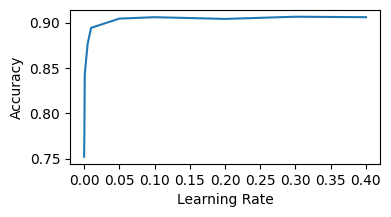

In [73]:
# Learning Rate

# Create figure
plt.figure(figsize=(4,2))

# Plot data
plt.plot(lr_vals,lr_scores)

# Format chart
plt.xticks(np.arange(0, 0.45, 0.05))
plt.yticks(np.arange(0.75, 0.95, 0.05))
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

# Show chart
plt.show()

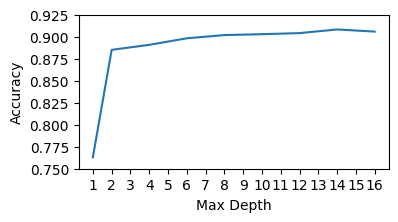

In [74]:
# Max depth

# Create figure
plt.figure(figsize=(4,2))

# Plot data
plt.plot(depth_values,depth_scores)

# Format chart
plt.xticks(np.arange(1,17, 1))
plt.yticks(np.arange(0.75, 0.95, 0.025))
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

# Show chart
plt.show()

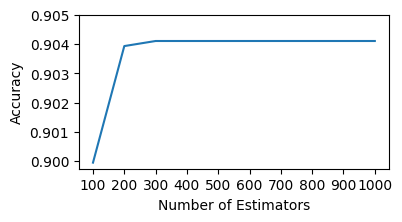

In [75]:
# Number of estimators

# Create figure
plt.figure(figsize=(4,2))

# Plot data
plt.plot(n_est_values,n_est_scores)

# Format chart
plt.xticks(np.arange(100,1100, 100))
plt.yticks(np.arange(0.9, 0.905, 0.001))
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')

# Show chart
plt.show()

# 3m. Ablation Analysis - XGB Final Model - Keep all variables

In [76]:
# Create x and y variables
X = purchases[['num_page_views','session_duration','recency','frequency']]
y = purchases[[prod_cat]]
y = y.values.reshape(-1,)

# Set up train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 99)

# Create SMOTE instance
smote = SMOTE(random_state=99)

# Use SMOTE on training data
X_res, y_res = smote.fit_resample(X_train,y_train.ravel())

# Count number of 1s post SMOTE resampling 
ones = sum(y_res == 1)
print("Number of ones:",ones)

# Count number of 0s post SMOTE resampling 
zeros = sum(y_res == 0)
print("Number of zeros:",zeros)

# Create model
xgb_all = XGBClassifier(objective='binary:logistic',
                         learning_rate=0.2,
                         n_estimators=400, min_child_weight=5,gamma=0.4,
                         colsample_bytree=1.0,
                         max_depth=12,random_state=99)
# Fit model
xgb_all.fit(X_res,y_res)

# Make predictions
y_pred = xgb_all.predict(X_test)

# Set up framework for evaluation metrics
models = {
    'XGBoost': xgb_all
}

results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Use cross-validation to calculate evaluation metrics
for model_name, model in models.items():
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(model, X_res, y_res, cv=5, scoring=scoring)
    accuracy = scores['test_accuracy'].mean()
    precision = scores['test_precision_macro'].mean()
    recall = scores['test_recall_macro'].mean()
    f1_score = scores['test_f1_macro'].mean()
    f1_std = scores['test_f1_macro'].std()
    results = results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score,'F1 Stdev': f1_std}, ignore_index=True)

# Evaluation based on test set
for model_name, model in models.items():
    model.fit(X_res, y_res)
    accuracy = model.score(X_test, y_test)
    #f1_score = f1_score(y_test, y_pred,average='weighted')
    results.loc[results['Model'] == model_name, 'Accuracy on Test Set'] = accuracy

# Print and show classification report
print(classification_report(y_test, y_pred))

# Show results
results

Number of ones: 16136
Number of zeros: 16136
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5376
           1       0.32      0.34      0.33       401

    accuracy                           0.90      5777
   macro avg       0.64      0.64      0.64      5777
weighted avg       0.91      0.90      0.91      5777



,Model,Accuracy,Precision,Recall,F1 Score,F1 Stdev,Accuracy on Test Set
0,XGBoost,0.937688,0.939882,0.937685,0.937515,0.032028,0.904102


# 3m. Ablation Analysis - XGB Final Model - Remove Browsing Session Duration

In [77]:
# Create x and y variables
X = purchases[['num_page_views','recency','frequency']]
y = purchases[[prod_cat]]
y = y.values.reshape(-1,)

# Set up training-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 99)

# Create SMOTE instance 
smote = SMOTE(random_state=99)

# Use SMOTE on training data
X_res, y_res = smote.fit_resample(X_train,y_train.ravel())

# Count number of 1s post SMOTE resampling
ones = sum(y_res == 1)
print("Number of ones:",ones)

# Count number of 0s post SMOTE resampling 
zeros = sum(y_res == 0)
print("Number of zeros:",zeros)

# Create model
xgb_no_duration = XGBClassifier(objective='binary:logistic',
                         learning_rate=0.2,
                         n_estimators=400, min_child_weight=5,gamma=0.4,
                         colsample_bytree=1.0,
                         max_depth=12,random_state=99)
# Fit model
xgb_no_duration.fit(X_res,y_res)

# Make predictions
y_pred = xgb_no_duration.predict(X_test)

# Set up framework for evaluation
models = {
    'XGBoost': xgb_no_duration
}

results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Calculate evaluation metrics using cross-validation 
for model_name, model in models.items():
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(model, X_res, y_res, cv=5, scoring=scoring)
    accuracy = scores['test_accuracy'].mean()
    precision = scores['test_precision_macro'].mean()
    recall = scores['test_recall_macro'].mean()
    f1_score = scores['test_f1_macro'].mean()
    f1_std = scores['test_f1_macro'].std()
    results = results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score,'F1 Stdev': f1_std}, ignore_index=True)

# Evaluation metrics on test set
for model_name, model in models.items():
    model.fit(X_res, y_res)
    accuracy = model.score(X_test, y_test)
    #f1_score = f1_score(y_test, y_pred,average='weighted')
    results.loc[results['Model'] == model_name, 'Accuracy on Test Set'] = accuracy

# Calculate and show classification report
#print(classification_report(y_test, y_pred))

# Show results
results

Number of ones: 16136
Number of zeros: 16136


,Model,Accuracy,Precision,Recall,F1 Score,F1 Stdev,Accuracy on Test Set
0,XGBoost,0.894275,0.895719,0.894272,0.894132,0.024717,0.867925


# 3m. Ablation Analysis - XGB Final Model - Remove Recency

In [78]:
# Create x and y variables
X = purchases[['num_page_views','session_duration','frequency']]
y = purchases[[prod_cat]]
y = y.values.reshape(-1,)

# Set up train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 99)

# Create SMOTE instance
smote = SMOTE(random_state=99)

# Use SMOTE on training data
X_res, y_res = smote.fit_resample(X_train,y_train.ravel())

# Count number of 1s post SMOTE resampling 
ones = sum(y_res == 1)
print("Number of ones:",ones)

# Count number of 0s post SMOTE resampling
zeros = sum(y_res == 0)
print("Number of zeros:",zeros)

# Create model
xgb_no_recency = XGBClassifier(objective='binary:logistic',
                         learning_rate=0.2,
                         n_estimators=400, min_child_weight=5,gamma=0.4,
                         colsample_bytree=1.0,
                         max_depth=12,random_state=99)
# Fit model
xgb_no_recency.fit(X_res,y_res)

# Make predictions
y_pred = xgb_no_recency.predict(X_test)

# Set up framework for evaluation metrics
models = {
    'XGBoost': xgb_no_recency
}

results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Calculate evaluation metrics using cross-validation
for model_name, model in models.items():
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(model, X_res, y_res, cv=5, scoring=scoring)
    accuracy = scores['test_accuracy'].mean()
    precision = scores['test_precision_macro'].mean()
    recall = scores['test_recall_macro'].mean()
    f1_score = scores['test_f1_macro'].mean()
    f1_std = scores['test_f1_macro'].std()
    results = results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score,'F1 Stdev': f1_std}, ignore_index=True)

# Calculate evaluation metrics on test set
for model_name, model in models.items():
    model.fit(X_res, y_res)
    accuracy = model.score(X_test, y_test)
    #f1_score = f1_score(y_test, y_pred,average='weighted')
    results.loc[results['Model'] == model_name, 'Accuracy on Test Set'] = accuracy

# Calculate and show classification report
print(classification_report(y_test, y_pred))

# Show results
results

Number of ones: 16136
Number of zeros: 16136
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      5376
           1       0.21      0.30      0.25       401

    accuracy                           0.88      5777
   macro avg       0.58      0.61      0.59      5777
weighted avg       0.90      0.88      0.88      5777



,Model,Accuracy,Precision,Recall,F1 Score,F1 Stdev,Accuracy on Test Set
0,XGBoost,0.91736,0.919184,0.917358,0.917208,0.03424,0.875195


# 3m.  Ablation Analysis - XGB Final Model - Remove Frequency

In [79]:
# Create x and y variables
X = purchases[['num_page_views','session_duration','recency']]
y = purchases[[prod_cat]]
y = y.values.reshape(-1,)

# Set up train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 99)

# Create SMOTE instance
smote = SMOTE(random_state=99)

# Use SMOTE on training data
X_res, y_res = smote.fit_resample(X_train,y_train.ravel())

# Count number of 1s post SMOTE resampling 
ones = sum(y_res == 1)
print("Number of ones:",ones)

# Count number of 0s post SMOTE resampling 
zeros = sum(y_res == 0)
print("Number of zeros:",zeros)

# Create model
xgb_all = XGBClassifier(objective='binary:logistic',
                         learning_rate=0.2,
                         n_estimators=400, min_child_weight=5,gamma=0.4,
                         colsample_bytree=1.0,
                         max_depth=12,random_state=99)
# Fit model
xgb_all.fit(X_res,y_res)

# Make predictions
y_pred = xgb_all.predict(X_test)

# Set up framework for evaluation metrics
models = {
    'XGBoost': xgb_all
}

results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Use cross-validation to calculate evaluation metrics
for model_name, model in models.items():
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(model, X_res, y_res, cv=5, scoring=scoring)
    accuracy = scores['test_accuracy'].mean()
    precision = scores['test_precision_macro'].mean()
    recall = scores['test_recall_macro'].mean()
    f1_score = scores['test_f1_macro'].mean()
    f1_std = scores['test_f1_macro'].std()
    results = results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score,'F1 Stdev': f1_std}, ignore_index=True)

# Evaluation based on test set
for model_name, model in models.items():
    model.fit(X_res, y_res)
    accuracy = model.score(X_test, y_test)
    #f1_score = f1_score(y_test, y_pred,average='weighted')
    results.loc[results['Model'] == model_name, 'Accuracy on Test Set'] = accuracy

# Print and show classification report
print(classification_report(y_test, y_pred))

# Show results
results

Number of ones: 16136
Number of zeros: 16136
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5376
           1       0.30      0.32      0.31       401

    accuracy                           0.90      5777
   macro avg       0.63      0.63      0.63      5777
weighted avg       0.90      0.90      0.90      5777



,Model,Accuracy,Precision,Recall,F1 Score,F1 Stdev,Accuracy on Test Set
0,XGBoost,0.928144,0.930191,0.928141,0.927966,0.031235,0.900814


# 3m.  Ablation Analysis - XGB Final Model - Remove Number of Page Views

In [80]:
# Create x and y variables
X = purchases[['session_duration','recency','frequency']]
y = purchases[[prod_cat]]
y = y.values.reshape(-1,)

# Set up train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 99)

# Create SMOTE instance
smote = SMOTE(random_state=99)

# Use SMOTE on training data
X_res, y_res = smote.fit_resample(X_train,y_train.ravel())

# Count number of 1s post SMOTE resampling 
ones = sum(y_res == 1)
print("Number of ones:",ones)

# Count number of 0s post SMOTE resampling 
zeros = sum(y_res == 0)
print("Number of zeros:",zeros)

# Create model
xgb_all = XGBClassifier(objective='binary:logistic',
                         learning_rate=0.2,
                         n_estimators=400, min_child_weight=5,gamma=0.4,
                         colsample_bytree=1.0,
                         max_depth=12,random_state=99)
# Fit model
xgb_all.fit(X_res,y_res)

# Make predictions
y_pred = xgb_all.predict(X_test)

# Set up framework for evaluation metrics
models = {
    'XGBoost': xgb_all
}

results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Use cross-validation to calculate evaluation metrics
for model_name, model in models.items():
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(model, X_res, y_res, cv=5, scoring=scoring)
    accuracy = scores['test_accuracy'].mean()
    precision = scores['test_precision_macro'].mean()
    recall = scores['test_recall_macro'].mean()
    f1_score = scores['test_f1_macro'].mean()
    f1_std = scores['test_f1_macro'].std()
    results = results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score,'F1 Stdev': f1_std}, ignore_index=True)

# Evaluation based on test set
for model_name, model in models.items():
    model.fit(X_res, y_res)
    accuracy = model.score(X_test, y_test)
    #f1_score = f1_score(y_test, y_pred,average='weighted')
    results.loc[results['Model'] == model_name, 'Accuracy on Test Set'] = accuracy

# Print and show classification report
print(classification_report(y_test, y_pred))

# Show results
results

Number of ones: 16136
Number of zeros: 16136
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      5376
           1       0.19      0.52      0.28       401

    accuracy                           0.82      5777
   macro avg       0.58      0.68      0.59      5777
weighted avg       0.91      0.82      0.85      5777



,Model,Accuracy,Precision,Recall,F1 Score,F1 Stdev,Accuracy on Test Set
0,XGBoost,0.862079,0.863985,0.862079,0.861903,0.010185,0.817899


# 3n. Analyze Important Tradeoffs --- Learning Curve - XGB with SMOTE

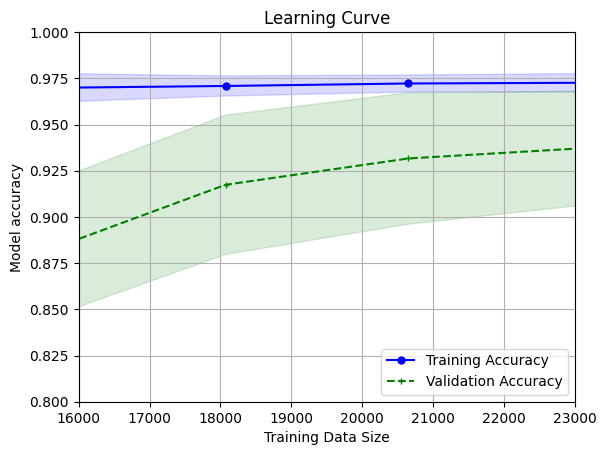

In [81]:
# Create x and y variables
X = purchases[['num_page_views','session_duration','recency','frequency']]
y = purchases[[prod_cat]]
y = y.values.reshape(-1,)

# Set up train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 99)

# Create SMOTE instance 
smote = SMOTE(random_state=99)

# Use SMOTE on training data
X_res, y_res = smote.fit_resample(X_train,y_train.ravel())

# Create pipeline
pipeline = make_pipeline(
                        XGBClassifier(objective='binary:logistic',
                         learning_rate=0.2,
                         n_estimators=400, min_child_weight=5,gamma=0.2,
                         colsample_bytree=1.0,
                         max_depth=12,random_state=99))

#  Create learning curve
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_res, y=y_res,
                                                       cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)

# Calculate train and set set mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.xlim([16000,23000])
plt.ylim([0.8,1.0])
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# 3o. Failure Analysis

In [82]:
# Review newly created failure df based on prod/cat choice

# Review first few rows
print(failure_df.head(3))

# Get value counts for true values and preds
print("Counts y_test:",failure_df['y_test'].value_counts())
print("Counts y_pred:",failure_df['y_pred'].value_counts())

# Show summary stats
failure_df.describe()

       y_test  y_pred  num_page_views  session_duration  recency  frequency
20786       0       0            12.0             211.0       13          9
22937       0       0             9.0            8828.0        1          2
22452       0       0             4.0              79.0        4          2
Counts y_test: 0    5376
1     401
Name: y_test, dtype: int64
Counts y_pred: 0    5352
1     425
Name: y_pred, dtype: int64


,y_test,y_pred,num_page_views,session_duration,recency,frequency
count,5777.000000,5777.000000,5777.000000,5777.000000,5777.000000,5777.000000
mean,0.069413,0.073568,10.397611,8918.815302,72.161849,3.462524
std,0.254177,0.261088,18.400071,19201.865084,45.302358,4.862873
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000,262.000000,33.000000,1.000000
50%,0.000000,0.000000,6.000000,949.000000,68.000000,2.000000
75%,0.000000,0.000000,10.000000,4594.000000,111.000000,4.000000
max,1.000000,1.000000,293.000000,86106.000000,157.000000,56.000000


In [83]:
# Create subset of failures_df based on correct predictions
correct_purch = failure_df[(failure_df['y_pred']==1)&(failure_df['y_test']==1)]

# Review shape
print("Shape Correct Purch:",correct_purch.shape)

# Print summary stats
correct_purch.describe()

Shape Correct Purch: (136, 6)


,y_test,y_pred,num_page_views,session_duration,recency,frequency
count,136.0,136.0,136.000000,136.000000,136.000000,136.000000
mean,1.0,1.0,12.573529,12460.213235,81.941176,3.588235
std,0.0,0.0,15.563791,23757.610462,44.583798,2.414372
min,1.0,1.0,1.000000,0.000000,1.000000,1.000000
25%,1.0,1.0,4.000000,388.750000,50.250000,2.000000
50%,1.0,1.0,7.000000,1049.000000,81.500000,3.000000
75%,1.0,1.0,13.250000,9891.750000,122.000000,5.000000
max,1.0,1.0,77.000000,86059.000000,157.000000,11.000000


In [84]:
# Create subset of failures_df based on false positives
false_pos = failure_df[(failure_df['y_pred']==1)&(failure_df['y_test']==0)]

# Review shape
print("Shape False Pos:",false_pos.shape)

# Show key statistics
false_pos.describe()

Shape False Pos: (289, 6)


,y_test,y_pred,num_page_views,session_duration,recency,frequency
count,289.0,289.0,289.000000,289.000000,289.000000,289.000000
mean,0.0,1.0,3.519031,3031.671280,74.342561,1.363322
std,0.0,0.0,3.592114,12165.620377,45.579871,0.779181
min,0.0,1.0,1.000000,0.000000,3.000000,1.000000
25%,0.0,1.0,1.000000,0.000000,30.000000,1.000000
50%,0.0,1.0,3.000000,93.000000,73.000000,1.000000
75%,0.0,1.0,5.000000,415.000000,114.000000,1.000000
max,0.0,1.0,35.000000,85872.000000,155.000000,7.000000


In [85]:
# Show random sample of false positives
false_pos.sample(n=3)

,y_test,y_pred,num_page_views,session_duration,recency,frequency
21648,0,1,1.0,0.0,8,1
2768,0,1,3.0,62.0,131,1
3452,0,1,1.0,0.0,126,1


In [86]:
# Sort false positives
false_pos_sorted = false_pos.sort_values(by='session_duration',ascending=False)
false_pos_sorted.head(3)

,y_test,y_pred,num_page_views,session_duration,recency,frequency
10526,0,1,12.0,85872.0,75,4
16611,0,1,12.0,67536.0,36,1
19883,0,1,5.0,64497.0,18,1


In [87]:
# Create subset of failures based on false negatives
false_neg = failure_df[(failure_df['y_pred']==0)&(failure_df['y_test']==1)]

# Review shape
print("Shape False Neg:",false_neg.shape)

# Show key statistics
false_neg.describe()

Shape False Neg: (265, 6)


,y_test,y_pred,num_page_views,session_duration,recency,frequency
count,265.0,265.0,265.000000,265.000000,265.000000,265.000000
mean,1.0,0.0,5.818868,5768.803774,79.045283,1.852830
std,0.0,0.0,4.647949,14340.403902,44.725317,1.286969
min,1.0,0.0,1.000000,0.000000,1.000000,1.000000
25%,1.0,0.0,3.000000,229.000000,39.000000,1.000000
50%,1.0,0.0,5.000000,630.000000,82.000000,2.000000
75%,1.0,0.0,7.000000,2050.000000,115.000000,2.000000
max,1.0,0.0,60.000000,85336.000000,157.000000,12.000000


In [88]:
# Show sample of false negatives
false_neg.sample(n=3)

,y_test,y_pred,num_page_views,session_duration,recency,frequency
438,1,0,3.0,274.0,152,1
17884,1,0,4.0,370.0,29,1
3435,1,0,3.0,111.0,126,1


In [89]:
# Sort false negatives
false_neg_sorted = false_neg.sort_values(by='num_page_views',ascending=True)
false_neg_sorted.head(3)

,y_test,y_pred,num_page_views,session_duration,recency,frequency
15698,1,0,1.0,0.0,41,2
14785,1,0,1.0,0.0,45,3
600,1,0,1.0,0.0,150,1


# 3p.  Create function to test other products or categoies

In [90]:
def analyze_product(product):
    
    
    # Create x and y variables
    X = purchases[['num_page_views','session_duration','recency','frequency']]
    y = purchases[[product]]
    y = y.values.reshape(-1,)
    
    # Set up train-test split 
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 99)

    # Create SMOTE instance 
    smote = SMOTE(random_state=99)
    
    # Use SMOTE on training data
    X_res, y_res = smote.fit_resample(X_train,y_train.ravel())

    # Count number of 1s post SMOTE resampling
    ones = sum(y_res == 1)
    print("Number of ones:",ones)

    # Count number of 0s post SMOTE resampling
    zeros = sum(y_res == 0)
    print("Number of zeros:",zeros)

    # Create model
    xgb_test = XGBClassifier(objective='binary:logistic',
                             learning_rate=0.2,
                             n_estimators=400, min_child_weight=5,gamma=0.4,
                             colsample_bytree=1.0,
                             max_depth=12,random_state=99)
    # Fit model
    xgb_test.fit(X_res,y_res)

    # Make predictions
    y_pred = xgb_test.predict(X_test)

    # Set up evaluation metrics
    models = {
        'XGBoost': xgb_test
    }

    # Set up df for results
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

    # Use cross-validation then store in df
    for model_name, model in models.items():
        scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
        scores = cross_validate(model, X_res, y_res, cv=5, scoring=scoring)
        accuracy = scores['test_accuracy'].mean()
        precision = scores['test_precision_macro'].mean()
        recall = scores['test_recall_macro'].mean()
        f1_score = scores['test_f1_macro'].mean()
        f1_std = scores['test_f1_macro'].std()
        results = results.append({'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score,'F1 Stdev': f1_std}, ignore_index=True)
    print(results)
    
    # Get SHAP values
    explainer = shap.TreeExplainer(xgb_test)
    shap_values = explainer.shap_values(X_test)

    # Plot SHAP feature importance - bar chart
    shap_feat = ['num_page_views','session_duration','recency','frequency']
    shap.summary_plot(shap_values, X_test, plot_type="bar",feature_names=shap_feat)
    
    # Calculate and show classification report 
    print(classification_report(y_test, y_pred))

    # ROC-AUC curve

    # Create no-skill model for comparison
    ns_probs = [0 for _ in range(len(y_test))]

    # Calculate probabilities 
    xgb_probs = xgb_test.predict_proba(X_test)
    xgb_probs = xgb_probs[:,1]
    #print("xgb_probs shape",xgb_probs)

    # Create ROC-AUC curve for skilled model 
    xgb_auc = roc_auc_score(y_test, xgb_probs)
    xgb_fpr,xgb_tpr, _ = roc_curve(y_test, xgb_probs)

    # Create ROC-AUC curve for no-skilled model
    ns_auc = roc_auc_score(y_test, ns_probs)
    ns_fpr,ns_tpr, _ = roc_curve(y_test, ns_probs)

    # Create graph
    plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost Classifier')
    plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Classifier')

    # Add axis labels 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add legend
    plt.legend()

    # Show chart
    plt.show()

    # Print AUC scores
    print('XGBoost Classifier: ROC AUC=%.3f' % (xgb_auc))
    print('No Skill Classifier: ROC AUC=%.3f' % (ns_auc))
    
    return results

# 3p.  Test function on other products or categories

Number of ones: 12674
Number of zeros: 12674
     Model  Accuracy  Precision    Recall  F1 Score  F1 Stdev
0  XGBoost  0.843345   0.853274  0.843344  0.841451  0.071845


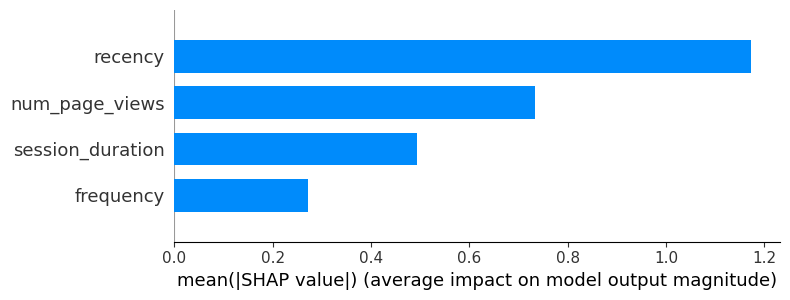

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      4212
           1       0.67      0.65      0.66      1565

    accuracy                           0.82      5777
   macro avg       0.77      0.76      0.77      5777
weighted avg       0.82      0.82      0.82      5777



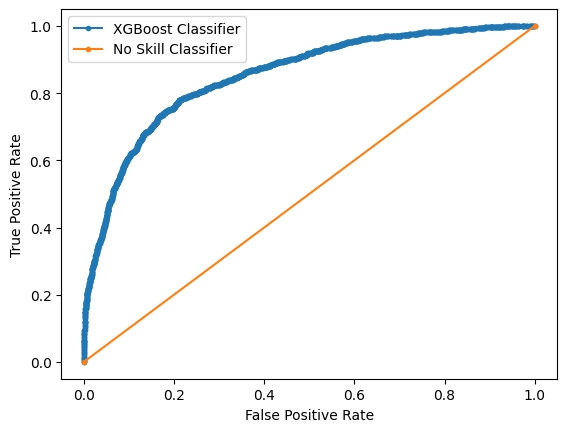

XGBoost Classifier: ROC AUC=0.853
No Skill Classifier: ROC AUC=0.500


In [91]:
videocards = analyze_product('product_videocards')

In [92]:
#computers = analyze_product('category_computers')

In [93]:
#electronics = analyze_product('category_electronics')

In [94]:
#appliances = analyze_product('category_appliances')

In [95]:
#printer = analyze_product('product_printer')

In [96]:
#motherboard = analyze_product('product_motherboard')

# Part 4:  Unsupervised Learning

# 4a.  Kmeans

# Test Case #1:  Elbow method based on normalized data, only create clusters based on the web-based metrics.  Does not use PCA.

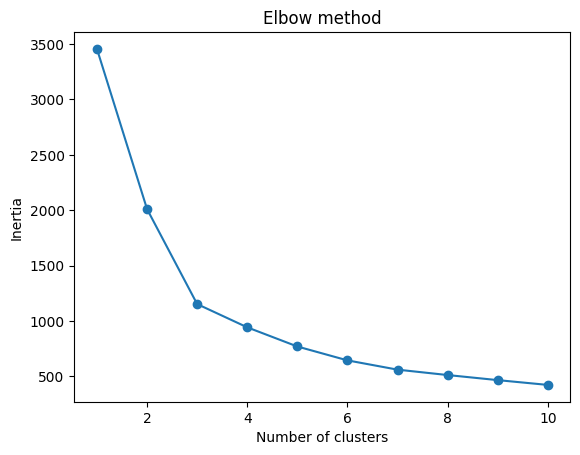

In [97]:
# Select x variables
X = purchases[['num_page_views','session_duration','recency','frequency','monetary_value']]

# Normalize x values
X_normalized = MinMaxScaler().fit(X).transform(X)

# Create elbow curve
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=99,init='k-means++')
    kmeans.fit(X_normalized)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1,11), inertias, marker='o')

# Add title and axis labels
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Show plot
plt.show()

# Calculate and show clusters based on optimal k from elbow method.  No PCA.

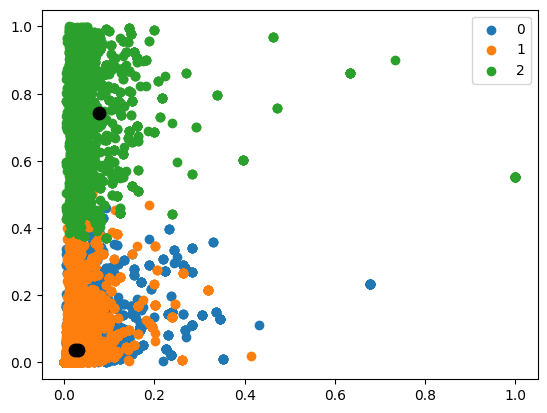

Silhouette score: 0.522


0    11394
1     9545
2     2167
Name: cluster, dtype: int64

In [98]:
# Select x variables
X = purchases[['num_page_views','session_duration','recency','frequency','monetary_value']].values

# Normalize x variables
X_normalized = MinMaxScaler().fit(X).transform(X)

# Create kmeans model
kmeans = KMeans(n_clusters=3, random_state=99,init='k-means++')

# Fit model
kmeans.fit(X_normalized)

# Predict labels
label = kmeans.fit_predict(X_normalized)

# Get unique labels
u_labels = np.unique(label)
 
# Get cluster centroids
centroids = kmeans.cluster_centers_
 
# Plot clusters
for i in u_labels:
    plt.scatter(X_normalized[label == i , 0] , X_normalized[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

# Calculate silhouette score
score = silhouette_score(X_normalized,kmeans.labels_,metric='euclidean')
print('Silhouette score: %.3f' % score)

# Calculate how many points in each cluster
frame = pd.DataFrame(X_normalized)
frame['cluster'] = label
frame['cluster'].value_counts()

# 4b.  Run PCA then Kmeans on smaller set of variables

# Calculate Explained Variance Curve For Smaller Set of Variables Only

[0.5461196043858974, 0.3340541191281894, 0.09522127047884116, 0.015143879709778289, 0.009461126297293534]


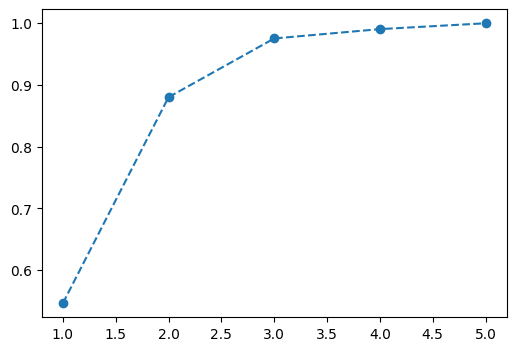

In [99]:
# Specify x variables
X = purchases[['num_page_views','session_duration','recency','frequency','monetary_value']].values
X_df= pd.DataFrame(X)

# Calculate how many PCAs needed to capture most of the variance
pca = PCA()

# Normalize x data
X_normalized = MinMaxScaler().fit(X).transform(X)

# Fit PCA
PCs = pca.fit_transform(X_normalized)

# Get explained variance ratios
print(list(pca.explained_variance_ratio_[0:5]))

# Plot cumulative variance explained
plt.figure(figsize=(6,4))
plt.plot(range(1,len(X_df.columns)+1),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')

# Elbow method for smaller set of variables

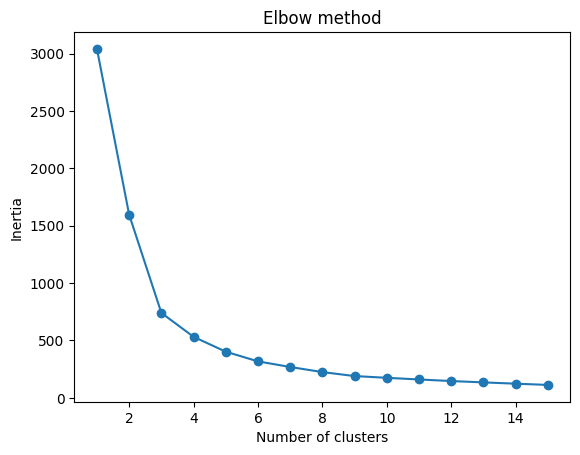

In [100]:
# Specify x variables
X = purchases[['num_page_views','session_duration','recency','frequency','monetary_value']].values

# Normalize data
X_normalized = MinMaxScaler().fit(X).transform(X)

# Use optimal number of PCAs from above to calculate PCA scores
pca2 = PCA(n_components=2)
scores_pca = pca2.fit_transform(X_normalized)
scores_pca

# Based on chosen number of PCAs, create elbow curve

# Creat empty list for inertia scores
inertias = []

# Loop through potential k values
for i in range(1,16):
    kmeans = KMeans(n_clusters=i,random_state=99,init='k-means++')
    kmeans.fit(scores_pca)
    inertias.append(kmeans.inertia_)

# Plot results
plt.plot(range(1,16), inertias, marker='o')

# Add title and axis labels
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Show plot
plt.show()

# Run PCA then kmeans based on chosen PCA and k

Silhouette score: 0.522
Calinski-Harabaz acore: 23101.647
Davies-Bouldin acore: 0.676


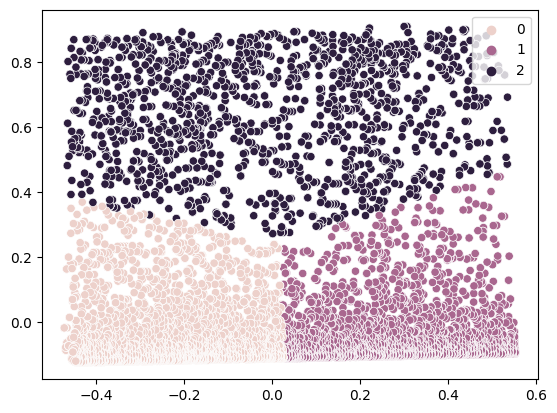

In [101]:
# Specify x variables
X = purchases[['num_page_views','session_duration','recency','frequency','monetary_value']].values

# Normalize data
X_normalized = MinMaxScaler().fit(X).transform(X)

# Create PCA instance
pca = PCA(n_components=2)

# Fit PCA
scores = pca.fit_transform(X_normalized)

# Run kmeans model
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters,random_state=99,init='k-means++').fit(scores)
c_train = kmeans.predict(scores)

# Create plot
sns.scatterplot(x=PCs[:,0],y=PCs[:,1],hue=c_train)

# Calulate silhouette score
score = silhouette_score(X_normalized,kmeans.labels_,metric='euclidean')
print('Silhouette score: %.3f' % score)

# Calculate Calinski-Harabaz score
ch_score = calinski_harabasz_score(X_normalized,kmeans.labels_)
print('Calinski-Harabaz acore: %.3f' % ch_score)

# Calculate Davies-Bouldin score
db_score = davies_bouldin_score(X_normalized,kmeans.labels_)
print('Davies-Bouldin acore: %.3f' % db_score)

# Add cluster numbers to purchases df
purchases['kmeans_cluster'] = pd.Series(c_train, index=purchases.index)

In [102]:
# Review kmeans cluster column
purchases['kmeans_cluster'].value_counts()

0    11405
1     9541
2     2160
Name: kmeans_cluster, dtype: int64

In [103]:
# Calculate median stats for each cluster
kmeans_cluster_median = purchases.groupby('kmeans_cluster')['num_page_views',
                                                            'session_duration','recency',
                                                            'frequency','monetary_value'].median()

# Show stats
kmeans_cluster_median.round(1)
kmeans_cluster_median.head()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,num_page_views,session_duration,recency,frequency,monetary_value
kmeans_cluster,,,,,
0,6.0,776.0,35.0,2.0,345.00
1,5.0,734.0,113.0,2.0,165.94
2,14.0,65248.0,67.0,3.0,408.58


In [104]:
# Calculate mean stats for each cluster
kmeans_cluster_mean = purchases.groupby('kmeans_cluster')['num_page_views',
                                    'session_duration','recency','frequency','monetary_value'].mean()

# Show stats
kmeans_cluster_mean.round(1)
kmeans_cluster_mean.head()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,num_page_views,session_duration,recency,frequency,monetary_value
kmeans_cluster,,,,,
0,9.865498,3326.557124,35.321438,3.509601,728.550520
1,7.926528,3139.396395,114.478671,3.004402,399.954482
2,23.787037,64065.694444,70.356019,4.655556,806.579065


# 4c.  Calculate silhouette plot - kmeans

For n_clusters = 3 The average silhouette_score is : 0.5813676550148904


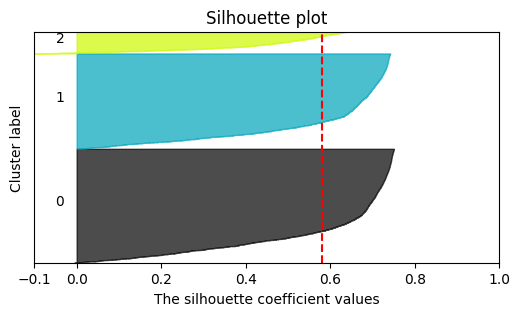

In [105]:
# Specify x variables
X = purchases[['num_page_views','session_duration','recency','frequency','monetary_value']].values

# Normalize data
X_normalized = MinMaxScaler().fit(X).transform(X)

# Create PCA instance
pca = PCA(n_components=2)

# Fit PCA model
scores = pca.fit_transform(X_normalized)

# Variable used to quickly change code below
test_var = scores

# Set range of clusters
range_n_clusters = [3]

# Create for loop
for n_clusters in range_n_clusters:
    
    # Create plot
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(6, 3)

    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(test_var) + (n_clusters + 1) * 10])
    
    # Create clusterer
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++',random_state=99)
    cluster_labels = clusterer.fit_predict(test_var)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(test_var, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(test_var, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 4d.  Agglomerative Clustering

# Create dendogram

In [106]:
# Specify x values
X = purchases[['num_page_views','session_duration','recency','frequency','monetary_value']].values

# Normalize x dta
X_normalized = MinMaxScaler().fit(X).transform(X)

# Set up PCA
pca = PCA(n_components = 2)

# Transform normalized data
X_principal = pca.fit_transform(X_normalized)

# Create df
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

# Create dendogram
#plt.figure(figsize =(5, 5))
#plt.title('Visualising the data')
#Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

# Use agglomerative clustering model to create and show clusters

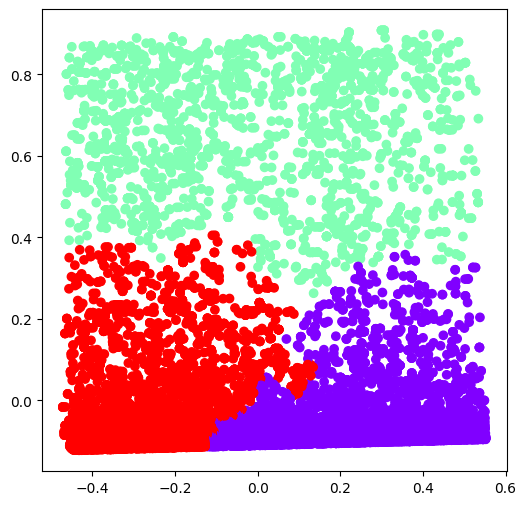

In [107]:
# Create agglomerative clustering model
ac2 = AgglomerativeClustering(n_clusters = 3)

# Fit model
agg_pred = ac2.fit_predict(X_principal)

# Create chart
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac2.fit_predict(X_principal), cmap ='rainbow')

# Show chart
plt.show()

# Add cluster numbers to purchases_df
purchases['agg_cluster'] = pd.Series(agg_pred, index=purchases.index)

In [108]:
# Review number of items in each cluster
purchases['agg_cluster'].value_counts()

0    11780
2     9229
1     2097
Name: agg_cluster, dtype: int64

In [109]:
# Calculate median statistics for each cluster
agg_cluster_median = purchases.groupby('agg_cluster')['num_page_views',
                                    'session_duration','recency','frequency','monetary_value'].median()
# Show results
agg_cluster_median.round(1)
agg_cluster_median.head()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,num_page_views,session_duration,recency,frequency,monetary_value
agg_cluster,,,,,
0,5.0,665.0,106.0,2.0,172.86
1,13.0,65827.0,72.0,3.0,405.34
2,6.0,976.0,28.0,2.0,399.48


In [110]:
# Calculate mean statistics for each cluster
agg_cluster_mean = purchases.groupby('agg_cluster')['num_page_views',
                                    'session_duration','recency','frequency','monetary_value'].mean()
# Show results
agg_cluster_mean.round(1)
agg_cluster_mean.head()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,num_page_views,session_duration,recency,frequency,monetary_value
agg_cluster,,,,,
0,7.440662,2443.666978,104.414941,2.869779,400.603780
1,24.049118,64867.259418,72.305675,4.636624,805.448474
2,10.991548,4492.493770,28.759129,3.816123,808.230273


# 4e. Silhouette plot - Agglomerative Clustering

For n_clusters = 3 The average silhouette_score is : 0.5284117324114297


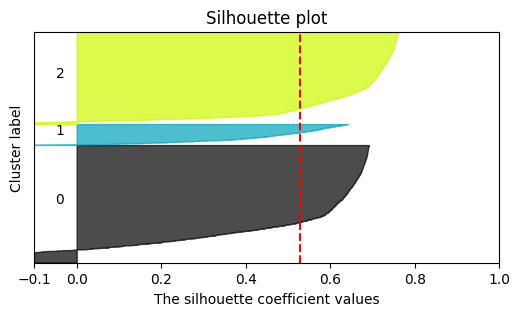

In [111]:
# Specfiy x variables
X = purchases[['num_page_views','session_duration','recency','frequency','monetary_value']].values

# Normalized data
X_normalized = MinMaxScaler().fit(X).transform(X)

# Create PCA instance
pca = PCA(n_components=2)

# Fit PCA model
scores = pca.fit_transform(X_normalized)

# Use this variable to edit code below
test_var = scores

# Set range of clusters
range_n_clusters = [3]

for n_clusters in range_n_clusters:
    
    # Create plot
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(6, 3)
    
    # Set limits
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(test_var) + (n_clusters + 1) * 10])
    
    # Create agglomerative clustering model
    clusterer = AgglomerativeClustering(n_clusters = 3)
    
    # Fit model
    cluster_labels = clusterer.fit_predict(test_var)

    # Calculate average silhouette score
    silhouette_avg = silhouette_score(test_var, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(test_var, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 4f. Sensitivity Analysis - Silhouette scores based on range of k values

[0.4475841137760742, 0.5284117324113914, 0.47322953154557057, 0.47412768239667763, 0.4724653671650644]


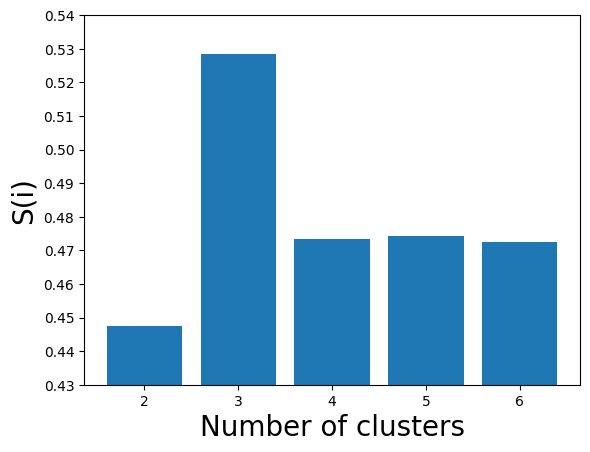

In [112]:
# Create list of potential k values
k = [2, 3, 4, 5, 6]
 
# Create empty list for silhouette scores
silhouette_scores = []

# Create loop to calculate silhouette scores for each k value
for i in k:
    ac = AgglomerativeClustering(n_clusters = i)
    fitted = ac.fit_predict(X_principal)
    new_score = silhouette_score(X_principal,fitted)
    silhouette_scores.append(new_score) 

# Print results
print(silhouette_scores)

# Create bar chart
plt.bar(k, silhouette_scores)

# Add axis labels
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)

# Adjust y axis
plt.ylim(0.43,0.54)
plt.yticks(np.arange(0.43, 0.54, 0.01))

# Show plot
plt.show()

# 4g.  Calculate stats to evaluate quality of clusters

In [113]:
# Create model
ac = AgglomerativeClustering(n_clusters = 3)

# Fit model
fitted = ac.fit_predict(X_principal)

# Calculate silhouette score
sil = silhouette_score(X_principal,fitted)
print("Silhouette Score: ",sil)

# Calculate Calinski-Harabaz score
ch = calinski_harabasz_score(X_principal,fitted)
print('Calinski-Harabaz acore: %.3f' % ch)

# Calculate Davies-Bouldin score
db = davies_bouldin_score(X_principal,fitted)
print('Davies-Bouldin acore: %.3f' % db)

Silhouette Score:  0.5284117324113914
Calinski-Harabaz acore: 29511.422
Davies-Bouldin acore: 0.611


In [114]:
# Review key statistics for monetary value column
purchases['monetary_value'].describe()

count    23106.000000
mean       600.159923
std       1075.710907
min          0.900000
25%         87.780000
50%        257.870000
75%        646.740000
max      12080.830000
Name: monetary_value, dtype: float64

# Show dependencies

In [115]:
from platform import python_version
print("Python: ",python_version())
print("Pandas:",pd.__version__)
print("Numpy:",np.__version__)
print("Seaborn:",sns.__version__)
print("Plotly:",plotly.__version__)
print("Matplotlib: ",mpl.__version__)
print("Sklearn: ",sklearn.__version__)
print("XGB: ",xgb.__version__)
print("Statsmodel: ",sm.__version__)
print("SHAP: ",shap.__version__)

Python:  3.7.16
Pandas: 1.3.5
Numpy: 1.21.6
Seaborn: 0.12.2
Plotly: 5.14.1
Matplotlib:  3.5.3
Sklearn:  1.0.2
XGB:  1.6.2
Statsmodel:  0.13.5
SHAP:  0.41.0


In [116]:
import sys
import platform
import pkg_resources
def linux_distribution():
  try:
    return platform.linux_distribution()
  except:
    return "N/A"
def dist():
  try:
    return platform.dist()
  except:
    return "N/A"
installed_packages = pkg_resources.working_set
installed_packages_list = sorted(["%s==%s" % (i.key, i.version)for i in installed_packages])
with open("envr_cofig.txt", "w") as text_file:
    text_file.write("""Python version: %s\n
    dist: %s\n
    linux_distribution: %s\n
    system: %s\n
    machine: %s\n
    platform: %s\n
    uname: %s\n
    version: %s\n
    mac_ver: %s\n
    """% (
    sys.version.split('\n'),
    str(dist()),
    linux_distribution(),
    platform.system(),
    platform.machine(),
    platform.platform(),
    platform.uname(),
    platform.version(),
    platform.mac_ver(),
    ))
    text_file.write("\n*******************\n* Python Packages *\n*******************\n\n")
    for x in installed_packages_list:
        text_file.write(x+"\n")

dist() and linux_distribution() functions are deprecated in Python 3.5
dist() and linux_distribution() functions are deprecated in Python 3.5


# End of notebook